# Análise dos dados coletados do Spotify
### Coleta realizada em: 

##### Trabalho de Conclusão de Curso - TCC


### Importação das bibliotecas e do arquivo 'dataframefinal.csv'

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Função definida para normalizar os valores
from sklearn.preprocessing import StandardScaler
def normalizar(array):
    standarlization = StandardScaler()
    return standarlization.fit_transform(array)

In [3]:
# Função para retornar um gráfito do método Elbow, com a finalidade de identificar a quantidade ideal de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def calculoElbow(array):
    wcss = []

    for i in range(1,10):
        kmeans = KMeans(n_clusters=i, init='random')
        kmeans.fit(array)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,10),wcss)
    plt.title('O Metodo Elbow')
    plt.xlabel('numero de Clusters')
    plt.ylabel('WSS')
    plt.show()
    

In [66]:
# Função para plotar um gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plotBar(titulo, xLabel, yLabel, columnX, columnY, dataframe):
    fig = plt.figure(figsize=(10,8))
    fig.add_subplot(1,1,1)

    ax = sns.barplot(y=columnY, x = columnX, data=dataframe, palette="Set2" )

    ax.axes.set_title(titulo,fontsize=29)
    ax.set_xlabel(xLabel,fontsize=12)
    ax.set_ylabel(yLabel,fontsize=12)
    ax.tick_params(labelsize=15)
    #sns.plt.show()
    plt.show()


In [4]:
# Leitura do arquivo
df = pd.read_csv('dataframefinal.csv')
# Remoção de colunas nao utilizadas para a análise
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', '_id', 'album', 'available_markets',
                      'disc_number','episode', 'uri', 'href', 'id', 'linked_from', 
                      'type', 'explicit','external_ids','external_urls','is_local', 'preview_url',
                     'track_number', 'track'])
# remoção de tuplas com valores NaN
df = df.dropna()
print('Tamanho do Dataframe: %d músicas' % len(df))

Tamanho do Dataframe: 42142 músicas


/home/adriano/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Jorge & Mateus,toplists,BR,175219,Tijolão - Ao Vivo,0,0.637,0.877,-3.680,0.1980,0.469,0.0,0.3430,0.691,118.889
1,Ed Sheeran,toplists,BR,206186,Cross Me (feat. Chance the Rapper & PnB Rock),0,0.746,0.787,-6.373,0.1200,0.214,0.0,0.0669,0.607,95.005
2,Paula Fernandes,toplists,BR,204000,Juntos,63,0.687,0.411,-8.619,0.0338,0.866,0.0,0.0967,0.184,101.851
3,Diego & Victor Hugo,toplists,BR,190276,Entregador de Flor - Ao Vivo em Brasília,0,0.376,0.834,-4.303,0.0800,0.549,0.0,0.4120,0.329,125.171
4,Dennis DJ,toplists,BR,224368,Megamix do Baile,0,0.847,0.847,-6.920,0.3530,0.475,0.0,0.1180,0.741,149.947


In [6]:
# Identificação da quantidade de músicas por país
df.country.value_counts()

BR    17928
FR    13040
JP    11174
Name: country, dtype: int64

In [11]:
# Agruamento por país, de modo geral o valor minimo, maximo, mediana, média e contagem por país
df.groupby('country').energy.agg(['min', 'max', 'median', 'mean', 'count'])

,min,max,median,mean,count
country,,,,,
BR,0.000175,1.000,0.651,0.612213,17928
FR,0.000235,0.998,0.664,0.616314,13040
JP,0.000243,0.999,0.701,0.654505,11174


In [27]:
df[df.danceability > 0].groupby('country').danceability.agg(['min', 'max', 'median', 'mean', 'count'])

,min,max,median,mean,count
country,,,,,
BR,0.0536,0.984,0.602,0.583473,17908
FR,0.0603,0.981,0.650,0.619680,13039
JP,0.0578,0.980,0.601,0.587718,11170


In [29]:
df[df.danceability > 0].danceability.describe()

count    42117.000000
mean         0.595808
std          0.173853
min          0.053600
25%          0.488000
50%          0.616000
75%          0.724000
max          0.984000
Name: danceability, dtype: float64

## Análise do Dataframe para o Brasil

In [73]:
# Filtrando o dataframe para mostrar dados do brasil
dfbr = df[df.country == 'BR']
dfbr.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Jorge & Mateus,toplists,BR,175219,Tijolão - Ao Vivo,0,0.637,0.877,-3.680,0.1980,0.469,0.0,0.3430,0.691,118.889
1,Ed Sheeran,toplists,BR,206186,Cross Me (feat. Chance the Rapper & PnB Rock),0,0.746,0.787,-6.373,0.1200,0.214,0.0,0.0669,0.607,95.005
2,Paula Fernandes,toplists,BR,204000,Juntos,63,0.687,0.411,-8.619,0.0338,0.866,0.0,0.0967,0.184,101.851
3,Diego & Victor Hugo,toplists,BR,190276,Entregador de Flor - Ao Vivo em Brasília,0,0.376,0.834,-4.303,0.0800,0.549,0.0,0.4120,0.329,125.171
4,Dennis DJ,toplists,BR,224368,Megamix do Baile,0,0.847,0.847,-6.920,0.3530,0.475,0.0,0.1180,0.741,149.947


In [8]:
pd.crosstab(df.country, df.category)

category,blues,brazilian,chill,classical,comedy,country,decades,dinner,edm_dance,family,...,romance,roots,sertanejo,sessions,sleep,soul,summer,toplists,travel,workout
country,,,,,,,,,,,,,,,,,,,,,
BR,0,710,612,260,305,0,279,194,846,946,...,264,60,748,364,405,0,981,221,250,511
FR,0,140,1019,600,0,0,392,179,624,0,...,251,50,0,0,100,0,923,125,130,955
JP,122,0,255,130,0,642,702,176,501,0,...,178,0,0,0,252,167,0,196,338,284


In [9]:
# Sem outra filtragem, verificação das 10 categorias com mais músicas encontradas
dfbr.category.value_counts().head(10)

inspirational    2072
mood             1390
popculture       1279
summer            981
family            946
rock              898
edm_dance         846
sertanejo         748
party             737
brazilian         710
Name: category, dtype: int64

In [13]:
# Contagem das categorias com mais músicas encontradas com a popularidade maior que 80
# Não fazendo parte de um playlist genérica
dfbr[(dfbr.popularity >= 80) & (dfbr.category != 'toplists')].category.value_counts().head(10)

mood         105
party         82
hiphop        80
pop           75
workout       44
summer        41
edm_dance     37
travel        35
latin         26
gaming        21
Name: category, dtype: int64

In [34]:
# Filtragem das músicas com a popularidade maior que 80
# Não fazendo parte de um playlist genérica
df80 = dfbr[(dfbr.popularity >= 80) & (dfbr.category != 'toplists')]
df80.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
223,MC Kevin o Chris,brazilian,BR,204930,Ela É do Tipo,83,0.632,0.398,-6.615,0.3730,0.945,0.0,0.228,0.633,90.695
296,OneRepublic,brazilian,BR,158899,Rescue Me,80,0.759,0.605,-7.737,0.0433,0.156,0.0,0.694,0.640,121.049
796,Luan Santana,brazilian,BR,181512,Vingança - Ao Vivo,80,0.608,0.729,-7.400,0.1280,0.151,0.0,0.201,0.431,165.959
1345,João Gustavo e Murilo,sertanejo,BR,179164,Lençol Dobrado,81,0.707,0.664,-5.042,0.0382,0.361,0.0,0.331,0.674,124.991
1347,Marília Mendonça,sertanejo,BR,175202,Bebaça - Ao Vivo,80,0.663,0.884,-3.400,0.0716,0.652,0.0,0.156,0.875,172.059


In [36]:
# Remoção das músicas duplicadas, para evitar inconsistência na quantidade de música por estilo
df80 = df80.drop_duplicates(subset="name")

In [51]:
# Visualização das músicas, ordenada pela popularidade
df80.sort_values("popularity", ascending=False)

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
3946,Billie Eilish,mood,BR,194087,bad guy,100,0.701,0.425,-10.965,0.3750,0.32800,0.130000,0.1000,0.562,135.128
8452,Lil Nas X,hiphop,BR,157066,Old Town Road - Remix,98,0.878,0.619,-5.560,0.1020,0.05330,0.000000,0.1130,0.639,136.041
3877,Ed Sheeran,mood,BR,219946,I Don't Care (with Justin Bieber),97,0.798,0.675,-5.041,0.0442,0.09120,0.000000,0.0894,0.842,101.956
10319,Daddy Yankee,workout,BR,193226,Con Calma,95,0.737,0.860,-2.652,0.0593,0.11000,0.000002,0.0574,0.656,93.989
4668,Jonas Brothers,mood,BR,181040,Sucker,95,0.842,0.734,-5.065,0.0588,0.04270,0.000000,0.1060,0.952,137.958
3900,Avicii,mood,BR,157202,SOS,95,0.802,0.645,-6.181,0.0715,0.27200,0.000000,0.1190,0.376,100.001
8450,Post Malone,hiphop,BR,158040,Sunflower - Spider-Man: Into the Spider-Verse,95,0.760,0.479,-5.574,0.0466,0.55600,0.000000,0.0703,0.913,89.911
8457,Lil Nas X,hiphop,BR,113013,Old Town Road,95,0.908,0.517,-6.063,0.1290,0.03610,0.000002,0.0949,0.471,136.019
3901,Taylor Swift,mood,BR,193040,ME! (feat. Brendon Urie of Panic! At The Disco),94,0.614,0.839,-4.143,0.0702,0.02910,0.000000,0.1120,0.657,182.123
3921,BTS,mood,BR,229773,Boy With Luv (feat. Halsey),94,0.645,0.862,-4.757,0.0965,0.09230,0.000000,0.1920,0.798,119.991


In [46]:
# Contagem e separação das músicas de acordo com o artista
countArtistas = df80.artists.value_counts().head(10)
countArtistas

Ariana Grande       10
Ed Sheeran           8
BTS                  7
Martin Garrix        6
Post Malone          5
Billie Eilish        5
Juice WRLD           4
Marshmello           4
Avicii               4
The Chainsmokers     4
Name: artists, dtype: int64

In [53]:
dfbrP80 = pd.DataFrame()
dfbrP80['artist'] = pd.Series(list(countArtistas.index))
dfbrP80['qtd_music'] = pd.Series(list(countArtistas.values))
dfbrP80

,artist,qtd_music
0,Ariana Grande,10
1,Ed Sheeran,8
2,BTS,7
3,Martin Garrix,6
4,Post Malone,5
5,Billie Eilish,5
6,Juice WRLD,4
7,Marshmello,4
8,Avicii,4
9,The Chainsmokers,4


In [55]:
countCategories = df80.category.value_counts().head(10)
dfbrCategoryP80 = pd.DataFrame()
dfbrCategoryP80['category'] = pd.Series(list(countCategories.index))
dfbrCategoryP80['qtd_music'] = pd.Series(list(countCategories.values))
dfbrCategoryP80

,category,qtd_music
0,mood,81
1,hiphop,48
2,party,42
3,pop,36
4,latin,20
5,workout,10
6,chill,9
7,gaming,9
8,travel,9
9,kpop,7


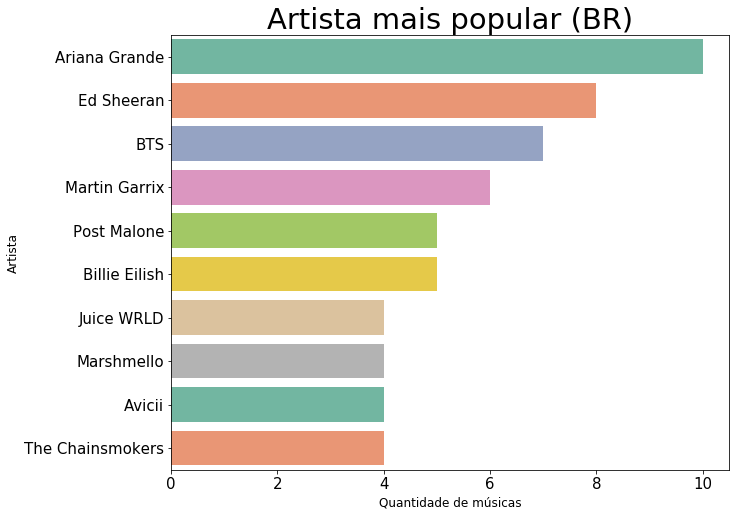

In [69]:
plotBar('Artista mais popular (BR)', 'Quantidade de músicas', 'Artista', 'qtd_music', 'artist', dfbrP80)

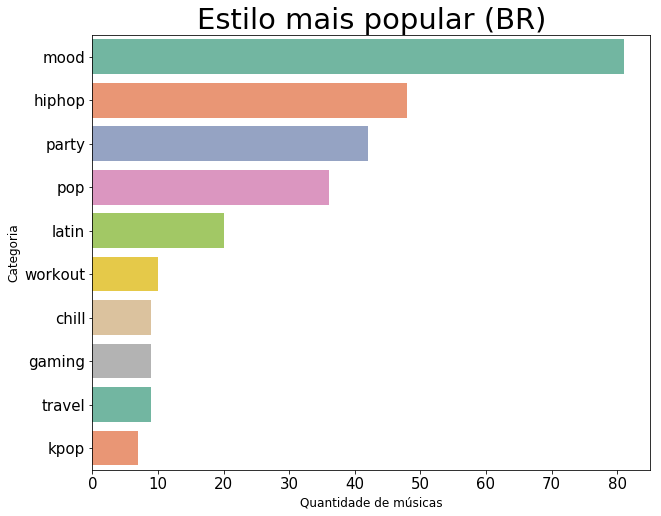

In [70]:
plotBar('Estilo mais popular (BR)', 'Quantidade de músicas', 'Categoria', 'qtd_music', 'category', dfbrCategoryP80)

In [71]:
df80.describe()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,207613.540193,84.067524,0.690482,0.641222,-5.966241,0.114935,0.226963,0.001762,0.167186,0.501236,119.246460
std,39397.145072,4.063838,0.138000,0.159709,2.298920,0.108038,0.233918,0.011211,0.127315,0.219742,28.324675
min,113013.000000,80.000000,0.209000,0.111000,-18.064000,0.023200,0.000282,0.000000,0.021500,0.068100,70.142000
25%,181396.000000,81.000000,0.600000,0.539500,-6.930000,0.043400,0.045800,0.000000,0.095250,0.334000,96.703500
50%,204326.000000,83.000000,0.701000,0.662000,-5.644000,0.070200,0.145000,0.000000,0.119000,0.494000,117.679000
75%,226066.500000,86.000000,0.793500,0.761000,-4.500500,0.129000,0.333500,0.000014,0.188000,0.655000,136.044500
max,354520.000000,100.000000,0.966000,0.922000,-1.874000,0.588000,0.978000,0.130000,0.869000,0.952000,202.006000


## Análise do dataframe para a França

In [74]:
# Filtrando o dataframe para mostrar dados do brasil
dffr = df[df.country == 'FR']
dffr.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
17934,Travis Scott,toplists,FR,312820,SICKO MODE,89,0.834,0.730,-3.714,0.2220,0.00513,0.000000,0.124,0.446,155.008
17935,Quavo,toplists,FR,169620,WORKIN ME,74,0.790,0.629,-4.055,0.1420,0.18200,0.000007,0.338,0.267,170.023
17936,Chef BRD,toplists,FR,146273,Start The Par-dee,47,0.777,0.561,-6.183,0.0927,0.03220,0.000002,0.182,0.521,128.073
17937,Ozuna,toplists,FR,176133,Vaina Loca,83,0.754,0.805,-4.249,0.0752,0.31500,0.000000,0.203,0.555,93.983
17938,benny blanco,toplists,FR,173799,Eastside (with Halsey & Khalid),87,0.560,0.680,-7.648,0.3210,0.55500,0.000000,0.116,0.319,89.391


In [75]:
# Sem outra filtragem, verificação das 10 categorias com mais músicas encontradas
dffr.category.value_counts().head(10)

french_variety    1927
mood              1347
chill             1019
workout            955
summer             923
party              693
edm_dance          624
classical          600
hiphop             583
pop                573
Name: category, dtype: int64

In [76]:
# Contagem das categorias com mais músicas encontradas com a popularidade maior que 80
# Não fazendo parte de um playlist genérica
dffr[(dffr.popularity >= 80) & (dffr.category != 'toplists')].category.value_counts().head(10)

pop          173
mood         163
party        147
workout      102
summer        38
chill         32
travel        28
edm_dance     25
romance       17
gaming        15
Name: category, dtype: int64

In [77]:
# Filtragem das músicas com a popularidade maior que 80
# Não fazendo parte de um playlist genérica
dffr80 = dffr[(dffr.popularity >= 80) & (dffr.category != 'toplists')]
dffr80.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
18059,Marshmello,pop,FR,202620,FRIENDS,84,0.626,0.880,-2.384,0.0504,0.205,0.000000,0.1280,0.534,95.079
18060,Ed Sheeran,pop,FR,233712,Shape of You,86,0.825,0.652,-3.183,0.0802,0.581,0.000000,0.0931,0.931,95.977
18061,Lauv,pop,FR,197436,I Like Me Better,85,0.752,0.505,-7.621,0.2530,0.535,0.000003,0.1040,0.419,91.970
18062,Dynoro,pop,FR,184560,In My Mind,86,0.694,0.770,-5.335,0.1490,0.176,0.000011,0.1180,0.163,125.905
18065,Rudimental,pop,FR,210772,"These Days (feat. Jess Glynne, Macklemore & Da...",82,0.653,0.809,-4.057,0.0474,0.194,0.000000,0.1650,0.550,92.213


In [78]:
# Remoção das músicas duplicadas, para evitar inconsistência na quantidade de música por estilo
dffr80 = dffr80.drop_duplicates(subset="name")

In [79]:
# Visualização das músicas, ordenada pela popularidade
dffr80.sort_values("popularity", ascending=False)

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
18119,Billie Eilish,pop,FR,194087,bad guy,100,0.701,0.425,-10.965,0.3750,0.32800,0.130000,0.1000,0.5620,135.128
18121,Lil Nas X,pop,FR,157066,Old Town Road - Remix,98,0.878,0.619,-5.560,0.1020,0.05330,0.000000,0.1130,0.6390,136.041
18578,Ed Sheeran,pop,FR,219946,I Don't Care (with Justin Bieber),97,0.798,0.675,-5.041,0.0442,0.09120,0.000000,0.0894,0.8420,101.956
18126,Post Malone,pop,FR,158040,Sunflower - Spider-Man: Into the Spider-Verse,95,0.760,0.479,-5.574,0.0466,0.55600,0.000000,0.0703,0.9130,89.911
18526,Jonas Brothers,pop,FR,181040,Sucker,95,0.842,0.734,-5.065,0.0588,0.04270,0.000000,0.1060,0.9520,137.958
18538,Avicii,pop,FR,157202,SOS,95,0.802,0.645,-6.181,0.0715,0.27200,0.000000,0.1190,0.3760,100.001
18560,Daddy Yankee,pop,FR,193226,Con Calma,95,0.737,0.860,-2.652,0.0593,0.11000,0.000002,0.0574,0.6560,93.989
18532,Shawn Mendes,pop,FR,190800,If I Can't Have You,94,0.692,0.809,-4.198,0.0602,0.52400,0.000000,0.1470,0.8640,123.911
18559,BTS,pop,FR,229773,Boy With Luv (feat. Halsey),94,0.645,0.862,-4.757,0.0965,0.09230,0.000000,0.1920,0.7980,119.991
18343,Taylor Swift,pop,FR,193040,ME! (feat. Brendon Urie of Panic! At The Disco),94,0.614,0.839,-4.143,0.0702,0.02910,0.000000,0.1120,0.6570,182.123


In [80]:
# Contagem e separação das músicas de acordo com o artista
countArtistasfr = dffr80.artists.value_counts().head(10)
countArtistasfr

Ariana Grande       9
Billie Eilish       8
Ed Sheeran          6
The Chainsmokers    5
Post Malone         5
Sam Smith           5
Avicii              4
XXXTENTACION        4
Marshmello          4
Lady Gaga           4
Name: artists, dtype: int64

In [81]:
dffrP80 = pd.DataFrame()
dffrP80['artist'] = pd.Series(list(countArtistasfr.index))
dffrP80['qtd_music'] = pd.Series(list(countArtistasfr.values))
dffrP80

,artist,qtd_music
0,Ariana Grande,9
1,Billie Eilish,8
2,Ed Sheeran,6
3,The Chainsmokers,5
4,Post Malone,5
5,Sam Smith,5
6,Avicii,4
7,XXXTENTACION,4
8,Marshmello,4
9,Lady Gaga,4


In [82]:
countCategoriesfr = dffr80.category.value_counts().head(10)
dffrCategoryP80 = pd.DataFrame()
dffrCategoryP80['category'] = pd.Series(list(countCategoriesfr.index))
dffrCategoryP80['qtd_music'] = pd.Series(list(countCategoriesfr.values))
dffrCategoryP80

,category,qtd_music
0,pop,133
1,mood,42
2,party,25
3,workout,16
4,summer,10
5,chill,9
6,gaming,8
7,rock,6
8,romance,5
9,travel,2


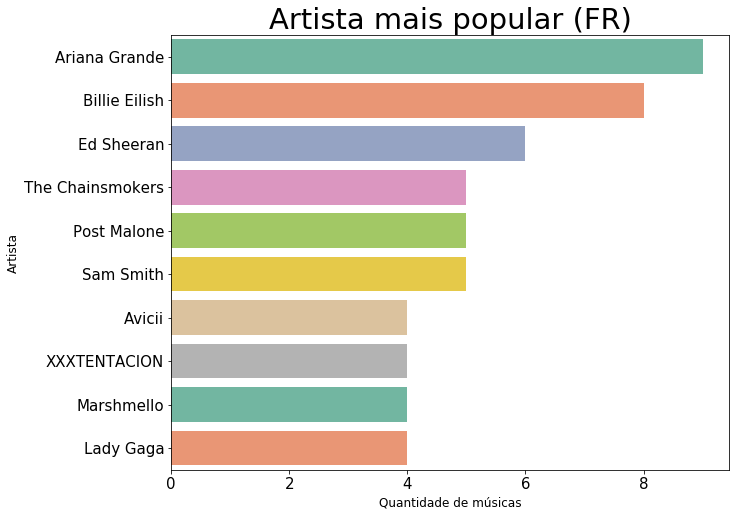

In [83]:
plotBar('Artista mais popular (FR)', 'Quantidade de músicas', 'Artista', 'qtd_music', 'artist', dffrP80)

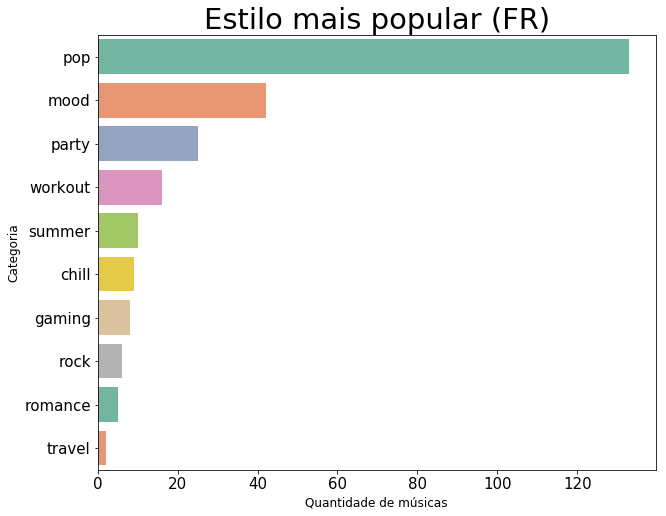

In [84]:
plotBar('Estilo mais popular (FR)', 'Quantidade de músicas', 'Categoria', 'qtd_music', 'category', dffrCategoryP80)

In [85]:
dffr80.describe()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,208243.238636,84.295455,0.681208,0.631894,-6.176996,0.103989,0.229312,0.004951,0.160248,0.495942,116.904636
std,39792.872472,4.094397,0.135042,0.160465,2.346374,0.097296,0.230781,0.029151,0.117895,0.215838,27.079102
min,95466.000000,80.000000,0.258000,0.111000,-18.064000,0.023200,0.000282,0.000000,0.021500,0.068100,62.446000
25%,181828.000000,81.000000,0.595750,0.528750,-7.223750,0.043375,0.045675,0.000000,0.090950,0.330750,96.984750
50%,203610.000000,83.000000,0.690000,0.644000,-5.844000,0.061900,0.154500,0.000000,0.116000,0.492500,113.905500
75%,226170.000000,86.250000,0.769250,0.754000,-4.718000,0.123000,0.363500,0.000017,0.179000,0.643000,133.995000
max,391376.000000,100.000000,0.966000,0.922000,-2.200000,0.501000,0.978000,0.312000,0.776000,0.969000,188.386000


## Análise do dataframe para a Japão

In [89]:
# Filtrando o dataframe para mostrar dados do brasil
dfjp = df[df.country == 'JP']
dfjp.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
31064,Ed Sheeran,toplists,JP,206186,Cross Me (feat. Chance the Rapper & PnB Rock),0,0.746,0.787,-6.373,0.120,0.21400,0.0000,0.0669,0.6070,95.005
31065,Young Thug,toplists,JP,200106,The London (feat. J. Cole & Travis Scott),0,0.796,0.586,-6.946,0.147,0.02470,0.0000,0.1320,0.1790,97.981
31066,Ty Dolla $ign,toplists,JP,163754,Purple Emoji (feat. J. Cole),64,0.707,0.543,-4.610,0.279,0.15100,0.0000,0.3840,0.8240,144.180
31067,5 Seconds of Summer,toplists,JP,157492,Easier,0,0.648,0.433,-5.533,0.147,0.49600,0.0000,0.0996,0.6140,87.997
31068,YG,toplists,JP,191813,In The Dark,0,0.724,0.257,-8.136,0.525,0.00427,0.0166,0.1050,0.0558,203.932


In [90]:
# Sem outra filtragem, verificação das 10 categorias com mais músicas encontradas
dfjp.category.value_counts().head(10)

gaming        1519
popculture    1102
decades        702
country        642
mood           630
pop            510
edm_dance      501
j_tracks       478
funk           451
hiphop         427
Name: category, dtype: int64

In [91]:
# Contagem das categorias com mais músicas encontradas com a popularidade maior que 80
# Não fazendo parte de um playlist genérica
dfjp[(dfjp.popularity >= 80) & (dfjp.category != 'toplists')].category.value_counts().head(10)

pop           82
mood          65
latin         43
gaming        39
chill         34
hiphop        33
edm_dance     20
workout       18
party         14
popculture    13
Name: category, dtype: int64

In [92]:
# Filtragem das músicas com a popularidade maior que 80
# Não fazendo parte de um playlist genérica
dfjp80 = dfjp[(dfjp.popularity >= 80) & (dfjp.category != 'toplists')]
dfjp80.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
31738,Billie Eilish,pop,JP,194087,bad guy,100,0.701,0.425,-10.965,0.3750,0.3280,0.130000,0.1000,0.562,135.128
31741,Camila Cabello,pop,JP,217306,Havana (feat. Young Thug),85,0.765,0.523,-4.333,0.0300,0.1840,0.000036,0.1320,0.394,104.988
31746,Anne-Marie,pop,JP,186986,2002,80,0.697,0.683,-2.881,0.1170,0.0372,0.000000,0.1370,0.603,96.133
31747,Marshmello,pop,JP,156346,Here With Me,92,0.791,0.565,-3.933,0.0439,0.0623,0.000000,0.1560,0.181,99.961
31752,Bruno Mars,pop,JP,217288,Finesse - Remix; feat. Cardi B,80,0.704,0.859,-4.877,0.0996,0.0185,0.000000,0.0215,0.926,105.115


In [93]:
# Remoção das músicas duplicadas, para evitar inconsistência na quantidade de música por estilo
dfjp80 = dfjp80.drop_duplicates(subset="name")

In [94]:
# Visualização das músicas, ordenada pela popularidade
dfjp80.sort_values("popularity", ascending=False)

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
31738,Billie Eilish,pop,JP,194087,bad guy,100,0.701,0.425,-10.965,0.3750,0.32800,0.130000,0.1000,0.562,135.128
31765,Lil Nas X,pop,JP,157066,Old Town Road - Remix,98,0.878,0.619,-5.560,0.1020,0.05330,0.000000,0.1130,0.639,136.041
31957,Ed Sheeran,pop,JP,219946,I Don't Care (with Justin Bieber),97,0.798,0.675,-5.041,0.0442,0.09120,0.000000,0.0894,0.842,101.956
31952,Jonas Brothers,pop,JP,181040,Sucker,95,0.842,0.734,-5.065,0.0588,0.04270,0.000000,0.1060,0.952,137.958
31964,Avicii,pop,JP,157202,SOS,95,0.802,0.645,-6.181,0.0715,0.27200,0.000000,0.1190,0.376,100.001
38280,Daddy Yankee,gaming,JP,193226,Con Calma,95,0.737,0.860,-2.652,0.0593,0.11000,0.000002,0.0574,0.656,93.989
41580,Lil Nas X,country,JP,113013,Old Town Road,95,0.908,0.517,-6.063,0.1290,0.03610,0.000002,0.0949,0.471,136.019
31948,Taylor Swift,pop,JP,193040,ME! (feat. Brendon Urie of Panic! At The Disco),94,0.614,0.839,-4.143,0.0702,0.02910,0.000000,0.1120,0.657,182.123
33336,BTS,popculture,JP,229773,Boy With Luv (feat. Halsey),94,0.645,0.862,-4.757,0.0965,0.09230,0.000000,0.1920,0.798,119.991
31954,Shawn Mendes,pop,JP,190800,If I Can't Have You,94,0.692,0.809,-4.198,0.0602,0.52400,0.000000,0.1470,0.864,123.911


In [95]:
# Contagem e separação das músicas de acordo com o artista
countArtistasjp = dfjp80.artists.value_counts().head(10)
countArtistasjp

Marshmello          6
Khalid              5
Ariana Grande       5
Ed Sheeran          5
Martin Garrix       5
Lauv                4
Bad Bunny           4
Zedd                4
The Chainsmokers    3
Becky G             3
Name: artists, dtype: int64

In [96]:
dfjpP80 = pd.DataFrame()
dfjpP80['artist'] = pd.Series(list(countArtistasjp.index))
dfjpP80['qtd_music'] = pd.Series(list(countArtistasjp.values))
dfjpP80

,artist,qtd_music
0,Marshmello,6
1,Khalid,5
2,Ariana Grande,5
3,Ed Sheeran,5
4,Martin Garrix,5
5,Lauv,4
6,Bad Bunny,4
7,Zedd,4
8,The Chainsmokers,3
9,Becky G,3


In [97]:
countCategoriesjp = dfjp80.category.value_counts().head(10)
dfjpCategoryP80 = pd.DataFrame()
dfjpCategoryP80['category'] = pd.Series(list(countCategoriesjp.index))
dfjpCategoryP80['qtd_music'] = pd.Series(list(countCategoriesjp.values))
dfjpCategoryP80

,category,qtd_music
0,pop,67
1,mood,32
2,gaming,31
3,hiphop,26
4,latin,16
5,chill,15
6,rock,7
7,edm_dance,6
8,popculture,6
9,decades,5


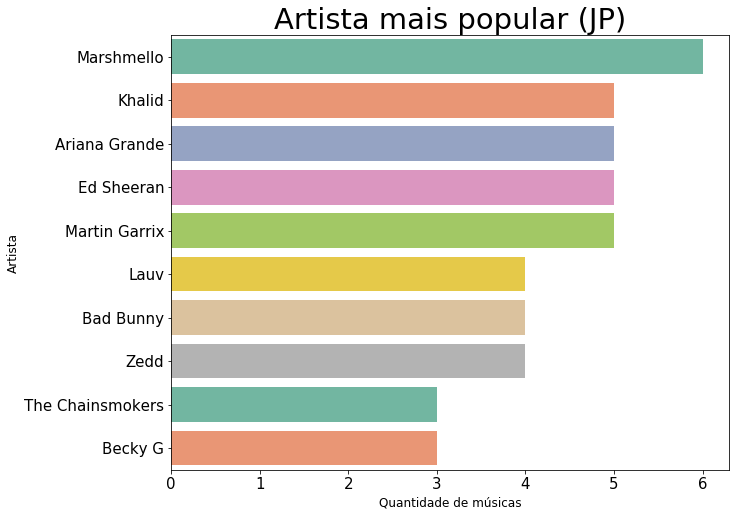

In [98]:
plotBar('Artista mais popular (JP)', 'Quantidade de músicas', 'Artista', 'qtd_music', 'artist', dfjpP80)

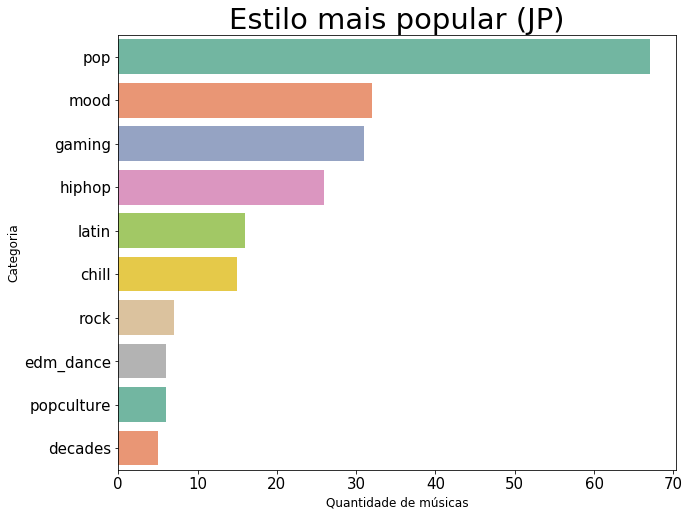

In [99]:
plotBar('Estilo mais popular (JP)', 'Quantidade de músicas', 'Categoria', 'qtd_music', 'category', dfjpCategoryP80)

##### Análise em relação a danceability

In [7]:
X = df.loc[ :, ["danceability"]].values
X

array([[0.637],
       [0.746],
       [0.687],
       ...,
       [0.789],
       [0.272],
       [0.616]])

In [8]:
# Normalização da danceability
Xst = normalizar(X)
Xst

array([[ 0.23821444],
       [ 0.86320151],
       [ 0.52490576],
       ...,
       [ 1.10975605],
       [-1.85463217],
       [ 0.11780409]])

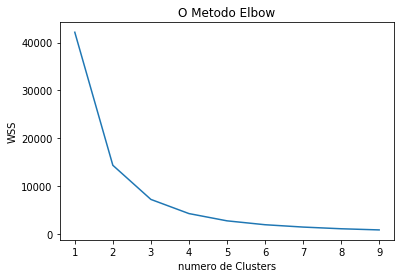

In [9]:
calculoElbow(Xst)

In [10]:
# Utilizando o Kmeans, é realizado a clusterização
# Ou seja, calculo a partir do vizinho mais próximo
# Então é mostrado o centro dos clursters
kmeans = KMeans(n_clusters=4)
kmeans.fit(Xst)
kmeans.cluster_centers_

array([[ 0.22584936],
       [-1.99036541],
       [ 1.12211408],
       [-0.72937886]])

In [11]:
# Clusterização
y_pred = KMeans(n_clusters=4).fit_predict(Xst)
df["cluster"] = y_pred
df.loc[ :, ["country", "cluster", "danceability"]].head()

,country,cluster,danceability
0,BR,2,0.637
1,BR,1,0.746
2,BR,2,0.687
3,BR,3,0.376
4,BR,1,0.847


#### Análise do Brasil

In [13]:
# Divisão do df para a análise do Brasil
dfbr = df[ df.country == "BR"]

In [14]:
dfbr.cluster.value_counts()

2    6109
3    5140
1    4563
0    2116
Name: cluster, dtype: int64

In [15]:
# Divisão do dfbr em df para cada cluster
dfcl0 = dfbr[ dfbr.cluster == 0]
dfcl1 = dfbr[ dfbr.cluster == 1]
dfcl2 = dfbr[ dfbr.cluster == 2]
dfcl3 = dfbr[ dfbr.cluster == 3]

In [16]:
media = dfcl0.danceability.mean(), dfcl1.danceability.mean(), dfcl2.danceability.mean(), dfcl3.danceability.mean()
print(media)

(0.25057986767485896, 0.7936743370589524, 0.6361997053527599, 0.46897373540856013)


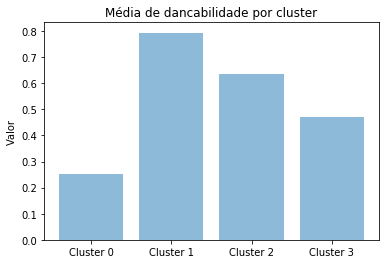

In [17]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = media

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de dancabilidade por cluster')

plt.show()

In [18]:
dfcl0.category.value_counts()[:10]

inspirational    450
sleep            261
popculture       201
classical        170
mood             122
focus            119
chill            113
rock             111
indie_alt         76
gaming            68
Name: category, dtype: int64

In [19]:
dfcl1.category.value_counts()[:10]

summer        441
party         386
hiphop        382
family        355
edm_dance     287
mood          284
popculture    278
sertanejo     225
pop           223
latin         219
Name: category, dtype: int64

In [20]:
dfcl2.category.value_counts()[:10]

mood             551
popculture       431
edm_dance        406
inspirational    399
family           398
sertanejo        359
summer           330
brazilian        315
rock             284
party            261
Name: category, dtype: int64

In [21]:
dfcl3.category.value_counts()[:10]

inspirational    1099
mood              433
rock              431
popculture        369
brazilian         185
summer            178
indie_alt         167
comedy            150
sertanejo         150
sessions          145
Name: category, dtype: int64

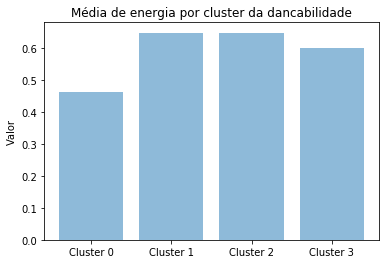

In [22]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.energy.mean(), dfcl1.energy.mean(), dfcl2.energy.mean(), dfcl3.energy.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de energia por cluster da dancabilidade')

plt.show()

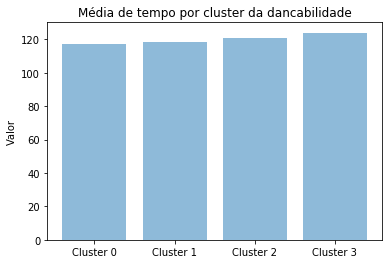

In [23]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.tempo.mean(), dfcl1.tempo.mean(), dfcl2.tempo.mean(), dfcl3.tempo.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de tempo por cluster da dancabilidade')

plt.show()

In [24]:
dfbr.columns

Index(['artists', 'category', 'country', 'duration_ms', 'name', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'cluster'],
      dtype='object')

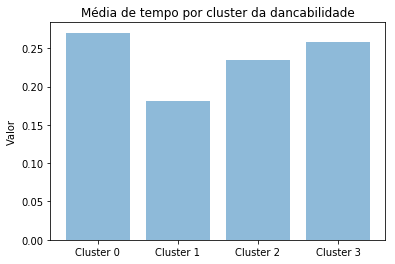

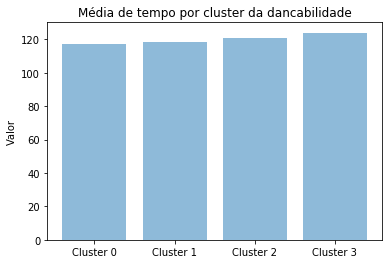

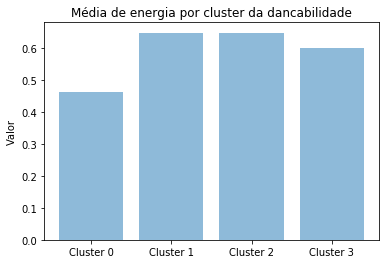

In [27]:
objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0['liveness'].mean(), dfcl1.liveness.mean(), dfcl2.liveness.mean(), dfcl3.liveness.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de tempo por cluster da dancabilidade')

plt.show()

objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.tempo.mean(), dfcl1.tempo.mean(), dfcl2.tempo.mean(), dfcl3.tempo.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de tempo por cluster da dancabilidade')

plt.show()

objects = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3')
y_pos = np.arange(len(objects))
performance = dfcl0.energy.mean(), dfcl1.energy.mean(), dfcl2.energy.mean(), dfcl3.energy.mean()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Valor')
plt.title('Média de energia por cluster da dancabilidade')

plt.show()